# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')

In [3]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [4]:
sinasc = sinasc.dropna(subset=['APGAR5'])


sinasc.loc[sinasc['APGAR5'] <= 3, 'asf_cat'] = 'asfixia severa'
sinasc.loc[(sinasc['APGAR5'] > 3) & (sinasc['APGAR5'] <= 5),
       'asf_cat'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] > 5) & (sinasc['APGAR5'] <= 7),
       'asf_cat'] = 'asfixia leve'
sinasc.loc[(sinasc['APGAR5'] > 7), 'asf_cat'] = 'normal'
sinasc['asf_cat'].value_counts()

normal              26463
asfixia leve          320
asfixia severa         74
asfixia moderada       68
Name: asf_cat, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

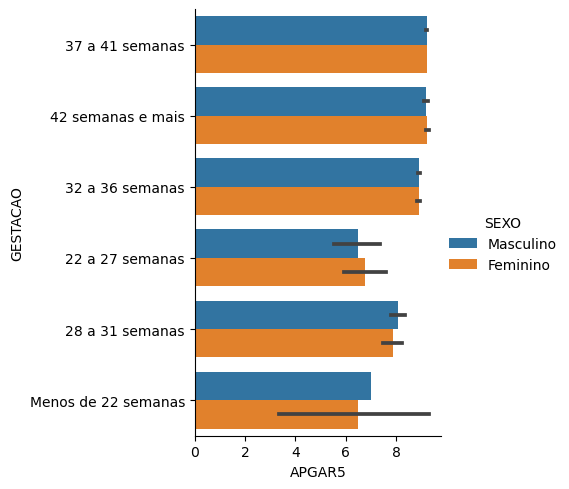

In [5]:
#distribuição de APGAR5 por sexo E TEMPO DE GESTAÇÃO
sns.catplot(x='APGAR5', y='GESTACAO'
            , hue = 'SEXO'
            , kind='bar'
            , data=sinasc
           )

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [6]:
freq = pd.crosstab(sinasc['APGAR5'], sinasc['GESTACAO'])
freq

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,7,0,2,5,1,1
1.0,0,0,2,20,0,0
2.0,8,2,2,3,0,1
3.0,6,1,2,5,0,0
4.0,1,5,8,7,0,0
5.0,0,7,11,21,1,0
6.0,2,7,17,45,1,0
7.0,10,11,56,151,5,1
8.0,24,61,362,1417,44,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [7]:
freq.sum(axis = 1)

APGAR5
0.0        16
1.0        22
2.0        16
3.0        14
4.0        21
5.0        40
6.0        72
7.0       234
8.0      1908
9.0     15372
10.0     7994
dtype: int64

In [16]:
# frequencia, estamos analisando qual a porcentagem de criaças nascidas com APGAR5 para cada periodo.
freq_pctlin = freq.div(freq.sum(axis = 0), axis = 1)
freq_pctlin

GESTACAO,22 a 27 semanas,28 a 31 semanas,32 a 36 semanas,37 a 41 semanas,42 semanas e mais,Menos de 22 semanas
APGAR5,,,,,,
0.0,0.082353,0.000000,0.000895,0.000222,0.001433,0.142857
1.0,0.000000,0.000000,0.000895,0.000888,0.000000,0.000000
2.0,0.094118,0.012346,0.000895,0.000133,0.000000,0.142857
3.0,0.070588,0.006173,0.000895,0.000222,0.000000,0.000000
4.0,0.011765,0.030864,0.003581,0.000311,0.000000,0.000000
5.0,0.000000,0.043210,0.004924,0.000932,0.001433,0.000000
6.0,0.023529,0.043210,0.007610,0.001998,0.001433,0.000000
7.0,0.117647,0.067901,0.025067,0.006704,0.007163,0.142857
8.0,0.282353,0.376543,0.162041,0.062913,0.063037,0.000000


In [18]:
#verificando se a frequencia esta certa
freq_pctlin.sum(axis = 0)

GESTACAO
22 a 27 semanas        1.0
28 a 31 semanas        1.0
32 a 36 semanas        1.0
37 a 41 semanas        1.0
42 semanas e mais      1.0
Menos de 22 semanas    1.0
dtype: float64

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [19]:
freq_pctlin_transpose = freq_pctlin.T
freq_pctlin_transpose

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


<AxesSubplot:xlabel='GESTACAO'>

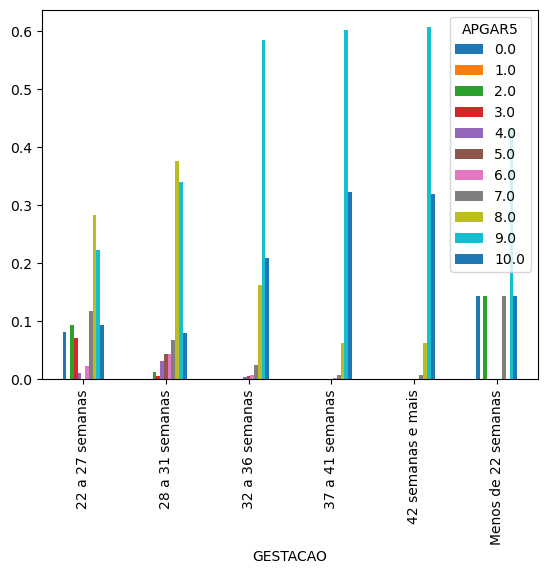

In [20]:
freq_pctlin_transpose.plot.bar()

De acordo com o grafico que fizemos, antes de 37 semanas a quantidade de crianças que tiveram sintomas de asfixia é maior. 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [27]:
pesos_acima_de_zero = sinasc['PESO'] > 0
sinasc_filtrado = sinasc[pesos_acima_de_zero]

<AxesSubplot:xlabel='APGAR5', ylabel='PESO'>

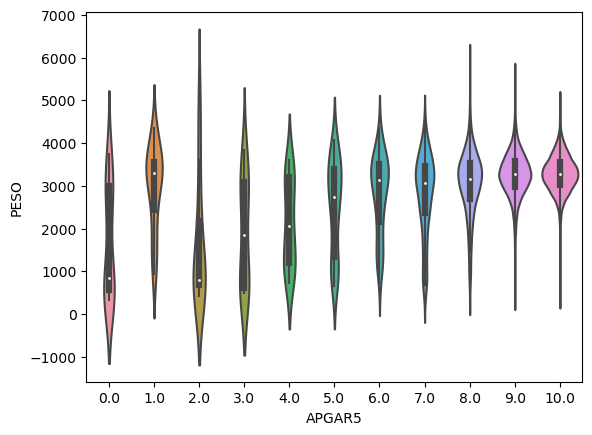

In [28]:
sns.violinplot(data=sinasc_filtrado, x='APGAR5', y='PESO', subset=pesos_acima_de_zero)

Com o grafico de violino é possivel ver que existe uma tendencia de que quando a criança tem um peso muito baixo o APGAR5 é menor.